#### Učitavanje baze i pretprocesiranje

In [165]:
import flair.datasets
from flair.data import Sentence
from flair.embeddings import WordEmbeddings, FlairEmbeddings, StackedEmbeddings
from flair.models  import SequenceTagger
from flair.trainers import ModelTrainer
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

corpus = flair.datasets.UD_SERBIAN().downsample(0.1)

2022-08-27 22:44:13,128 Reading data from C:\Users\vladimir\.flair\datasets\ud_serbian
2022-08-27 22:44:13,128 Train: C:\Users\vladimir\.flair\datasets\ud_serbian\sr_set-ud-train.conllu
2022-08-27 22:44:13,129 Dev: C:\Users\vladimir\.flair\datasets\ud_serbian\sr_set-ud-dev.conllu
2022-08-27 22:44:13,129 Test: C:\Users\vladimir\.flair\datasets\ud_serbian\sr_set-ud-test.conllu


In [166]:
# print the number of Sentences in the train split
print("Training: ",len(corpus.train))

# print the number of Sentences in the test split
print("Test: ",len(corpus.test))

# print the number of Sentences in the dev split
print("Dev: ",len(corpus.dev))

Training:  333
Test:  52
Dev:  54


In [167]:
# get the first Sentence in the training split
sentence = corpus.dev[1]

# print with all annotations
print(sentence)

# print only with POS annotations (better readability)
for token in sentence:
    print(token)

Sentence: "Sejdiu kaže da je , iz ove perspektive , proces " bio prenagljen … bez plana za ekonomski razvoj " i da je privatizacija dovela do velikih problema za radnike ." → ["Sejdiu"/Sejdiu/PROPN/Npmsn/nsubj/Nom/Masc/Sing, "kaže"/kazati/VERB/Vmr3s/root/Ind/Sing/3/Pres/Fin, "da"/da/SCONJ/Cs/mark, "je"/biti/AUX/Var3s/aux/Ind/Sing/3/Pres/Fin, ","/,/PUNCT/Z/punct, "iz"/iz/ADP/Sg/case/Gen, "ove"/ovaj/DET/Pd-fsg/det/Gen/Fem/Sing/Dem, "perspektive"/perspektiva/NOUN/Ncfsg/obl/Gen/Fem/Sing, ","/,/PUNCT/Z/punct, "proces"/proces/NOUN/Ncmsn/nsubj/Nom/Masc/Sing, """/"/PUNCT/Z/punct, "bio"/biti/AUX/Vap-sm/cop/Masc/Sing/Past/Part/Act, "prenagljen"/prenagliti/ADJ/Appmsnn/ccomp/Nom/Ind/Pos/Masc/Sing/Part/Pass, "…"/…/PUNCT/Z/punct, "bez"/bez/ADP/Sg/case/Gen, "plana"/plan/NOUN/Ncmsg/conj/Gen/Masc/Sing, "za"/za/ADP/Sa/case/Acc, "ekonomski"/ekonomski/ADJ/Agpmsayn/amod/Inan/Acc/Def/Pos/Masc/Sing, "razvoj"/razvoj/NOUN/Ncmsan/nmod/Inan/Acc/Masc/Sing, """/"/PUNCT/Z/punct, "i"/i/CCONJ/Cc/cc, "da"/da/SCONJ/Cs/

### UPOS TAGS:
- ADJ: adjective
- ADP: adposition
- ADV: adverb
- AUX: auxiliary
- CCONJ: coordinating conjunction
- DET: determiner
- INTJ: interjection
- NOUN: noun
- NUM: numeral
- PART: particle
- PRON: pronoun
- PROPN: proper noun
- PUNCT: punctuation
- SCONJ: subordinating conjunction
- SYM: symbol
- VERB: verb
- X: other

In [168]:
# Make the UPOS label dictionary from the corpus
label_type = 'upos'
label_dict  = corpus.make_label_dictionary(label_type = label_type)

# print dictionary
print(label_dict)

2022-08-27 22:44:20,029 Computing label dictionary. Progress:


333it [00:00, 20812.77it/s]

2022-08-27 22:44:20,046 Dictionary created for label 'upos' with 18 values: NOUN (seen 1859 times), PUNCT (seen 943 times), ADJ (seen 918 times), ADP (seen 743 times), VERB (seen 688 times), PROPN (seen 631 times), AUX (seen 505 times), SCONJ (seen 300 times), DET (seen 278 times), ADV (seen 260 times), CCONJ (seen 252 times), PRON (seen 200 times), NUM (seen 92 times), PART (seen 40 times), X (seen 25 times), SYM (seen 1 times), INTJ (seen 1 times)
Dictionary with 18 tags: <unk>, NOUN, PUNCT, ADJ, ADP, VERB, PROPN, AUX, SCONJ, DET, ADV, CCONJ, PRON, NUM, PART, X, SYM, INTJ


In [169]:
embedding_types = [
    WordEmbeddings('glove'),
    FlairEmbeddings('news-forward'),
    FlairEmbeddings('news-backward'),
]

embeddings = StackedEmbeddings(embeddings=embedding_types)

In [170]:
tagger = SequenceTagger(hidden_size=256,
                        embeddings=embeddings,
                        tag_dictionary=label_dict,
                        tag_type=label_type,
                        use_crf=True)

2022-08-27 22:44:22,359 SequenceTagger predicts: Dictionary with 18 tags: <unk>, NOUN, PUNCT, ADJ, ADP, VERB, PROPN, AUX, SCONJ, DET, ADV, CCONJ, PRON, NUM, PART, X, SYM, INTJ


In [171]:
trainer = ModelTrainer(tagger, corpus)

In [182]:
trainer.train('resources/taggers/example-upos',
              learning_rate=0.1,
              mini_batch_size=10,
              max_epochs=10)

2022-08-27 22:55:56,413 ----------------------------------------------------------------------------------------------------
2022-08-27 22:55:56,413 Model: "SequenceTagger(
  (embeddings): StackedEmbeddings(
    (list_embedding_0): WordEmbeddings(
      'glove'
      (embedding): Embedding(400001, 100)
    )
    (list_embedding_1): FlairEmbeddings(
      (lm): LanguageModel(
        (drop): Dropout(p=0.05, inplace=False)
        (encoder): Embedding(300, 100)
        (rnn): LSTM(100, 2048)
        (decoder): Linear(in_features=2048, out_features=300, bias=True)
      )
    )
    (list_embedding_2): FlairEmbeddings(
      (lm): LanguageModel(
        (drop): Dropout(p=0.05, inplace=False)
        (encoder): Embedding(300, 100)
        (rnn): LSTM(100, 2048)
        (decoder): Linear(in_features=2048, out_features=300, bias=True)
      )
    )
  )
  (word_dropout): WordDropout(p=0.05)
  (locked_dropout): LockedDropout(p=0.5)
  (embedding2nn): Linear(in_features=4196, out_features=4196, b

C:\Users\vladimir\anaconda3\envs\ML3\lib\site-packages\flair\trainers\trainer.py:64: UserWarning: There should be no best model saved at epoch 1 except there is a model from previous trainings in your training folder. All previous best models will be deleted.
  warnings.warn(


2022-08-27 22:55:57,505 epoch 1 - iter 3/34 - loss 1.62309501 - samples/sec: 27.75 - lr: 0.100000
2022-08-27 22:55:59,004 epoch 1 - iter 6/34 - loss 1.57166142 - samples/sec: 20.04 - lr: 0.100000
2022-08-27 22:55:59,931 epoch 1 - iter 9/34 - loss 1.58423563 - samples/sec: 32.43 - lr: 0.100000
2022-08-27 22:56:01,011 epoch 1 - iter 12/34 - loss 1.56466446 - samples/sec: 27.85 - lr: 0.100000
2022-08-27 22:56:02,322 epoch 1 - iter 15/34 - loss 1.53445869 - samples/sec: 22.93 - lr: 0.100000
2022-08-27 22:56:03,274 epoch 1 - iter 18/34 - loss 1.52627942 - samples/sec: 31.55 - lr: 0.100000
2022-08-27 22:56:04,303 epoch 1 - iter 21/34 - loss 1.50117781 - samples/sec: 29.15 - lr: 0.100000
2022-08-27 22:56:05,387 epoch 1 - iter 24/34 - loss 1.49259689 - samples/sec: 27.70 - lr: 0.100000
2022-08-27 22:56:06,485 epoch 1 - iter 27/34 - loss 1.47403614 - samples/sec: 27.37 - lr: 0.100000
2022-08-27 22:56:07,807 epoch 1 - iter 30/34 - loss 1.44372631 - samples/sec: 22.73 - lr: 0.100000
2022-08-27 22

100%|██████████| 6/6 [00:00<00:00,  7.84it/s]

2022-08-27 22:56:09,892 Evaluating as a multi-label problem: False
2022-08-27 22:56:09,900 DEV : loss 1.1318401098251343 - f1-score (micro avg)  0.6217
2022-08-27 22:56:09,904 BAD EPOCHS (no improvement): 0
2022-08-27 22:56:09,905 saving best model


2022-08-27 22:56:11,301 ----------------------------------------------------------------------------------------------------
2022-08-27 22:56:12,439 epoch 2 - iter 3/34 - loss 1.28358695 - samples/sec: 26.39 - lr: 0.100000
2022-08-27 22:56:13,554 epoch 2 - iter 6/34 - loss 1.27966517 - samples/sec: 26.95 - lr: 0.100000
2022-08-27 22:56:14,582 epoch 2 - iter 9/34 - loss 1.26144687 - samples/sec: 29.21 - lr: 0.100000
2022-08-27 22:56:15,825 epoch 2 - iter 12/34 - loss 1.26157131 - samples/sec: 24.15 - lr: 0.100000
2022-08-27 22:56:16,820 epoch 2 - iter 15/34 - loss 1.26064830 - samples/sec: 30.18 - lr: 0.100000
2022-08-27 22:56:17,895 epoch 2 - iter 18/34 - loss 1.24720567 - samples/sec: 27.98 - lr: 0.100000
2022-08-27 22:56:19,337 epoch 2 - iter 21/34 - loss 1.25311721 - samples/sec: 20.82 - lr: 0.100000
2022-08-27 22:56:20,274 epoch 2 - iter 24/34 - loss 1.23766817 - samples/sec: 32.05 - lr: 0.100000
2022-08-27 22:56:21,615 epoch 2 - iter 27/34 - loss 1.22825534 - samples/sec: 22.40 - 

100%|██████████| 6/6 [00:00<00:00,  7.98it/s]

2022-08-27 22:56:24,864 Evaluating as a multi-label problem: False
2022-08-27 22:56:24,873 DEV : loss 0.9363887906074524 - f1-score (micro avg)  0.6802
2022-08-27 22:56:24,879 BAD EPOCHS (no improvement): 0
2022-08-27 22:56:24,880 saving best model


2022-08-27 22:56:26,180 ----------------------------------------------------------------------------------------------------
2022-08-27 22:56:27,071 epoch 3 - iter 3/34 - loss 1.12135624 - samples/sec: 33.86 - lr: 0.100000
2022-08-27 22:56:28,514 epoch 3 - iter 6/34 - loss 1.11578234 - samples/sec: 20.80 - lr: 0.100000
2022-08-27 22:56:29,708 epoch 3 - iter 9/34 - loss 1.16393641 - samples/sec: 25.16 - lr: 0.100000
2022-08-27 22:56:31,039 epoch 3 - iter 12/34 - loss 1.11295983 - samples/sec: 22.56 - lr: 0.100000
2022-08-27 22:56:32,154 epoch 3 - iter 15/34 - loss 1.12012901 - samples/sec: 26.93 - lr: 0.100000
2022-08-27 22:56:33,278 epoch 3 - iter 18/34 - loss 1.11252632 - samples/sec: 26.71 - lr: 0.100000
2022-08-27 22:56:34,490 epoch 3 - iter 21/34 - loss 1.10135063 - samples/sec: 24.77 - lr: 0.100000
2022-08-27 22:56:35,579 epoch 3 - iter 24/34 - loss 1.10084324 - samples/sec: 27.60 - lr: 0.100000
2022-08-27 22:56:36,589 epoch 3 - iter 27/34 - loss 1.09618106 - samples/sec: 29.73 - 

100%|██████████| 6/6 [00:00<00:00,  7.80it/s]

2022-08-27 22:56:40,135 Evaluating as a multi-label problem: False
2022-08-27 22:56:40,145 DEV : loss 0.8654065132141113 - f1-score (micro avg)  0.6942
2022-08-27 22:56:40,151 BAD EPOCHS (no improvement): 0
2022-08-27 22:56:40,152 saving best model


2022-08-27 22:56:41,434 ----------------------------------------------------------------------------------------------------
2022-08-27 22:56:42,554 epoch 4 - iter 3/34 - loss 1.09634872 - samples/sec: 26.81 - lr: 0.100000
2022-08-27 22:56:43,683 epoch 4 - iter 6/34 - loss 1.06274488 - samples/sec: 26.60 - lr: 0.100000
2022-08-27 22:56:44,808 epoch 4 - iter 9/34 - loss 1.06179901 - samples/sec: 26.69 - lr: 0.100000
2022-08-27 22:56:45,945 epoch 4 - iter 12/34 - loss 1.03720434 - samples/sec: 26.41 - lr: 0.100000
2022-08-27 22:56:47,204 epoch 4 - iter 15/34 - loss 1.03582999 - samples/sec: 23.85 - lr: 0.100000
2022-08-27 22:56:48,197 epoch 4 - iter 18/34 - loss 1.02615225 - samples/sec: 30.30 - lr: 0.100000
2022-08-27 22:56:49,359 epoch 4 - iter 21/34 - loss 1.01580116 - samples/sec: 25.84 - lr: 0.100000
2022-08-27 22:56:50,483 epoch 4 - iter 24/34 - loss 1.00715543 - samples/sec: 26.71 - lr: 0.100000
2022-08-27 22:56:51,496 epoch 4 - iter 27/34 - loss 1.00649522 - samples/sec: 29.70 - 

100%|██████████| 6/6 [00:00<00:00,  7.83it/s]

2022-08-27 22:56:55,171 Evaluating as a multi-label problem: False
2022-08-27 22:56:55,179 DEV : loss 0.8614993095397949 - f1-score (micro avg)  0.7036
2022-08-27 22:56:55,183 BAD EPOCHS (no improvement): 0
2022-08-27 22:56:55,184 saving best model


2022-08-27 22:56:56,407 ----------------------------------------------------------------------------------------------------
2022-08-27 22:56:57,525 epoch 5 - iter 3/34 - loss 1.01165781 - samples/sec: 26.86 - lr: 0.100000
2022-08-27 22:56:58,473 epoch 5 - iter 6/34 - loss 1.00255601 - samples/sec: 31.68 - lr: 0.100000
2022-08-27 22:56:59,623 epoch 5 - iter 9/34 - loss 0.95650461 - samples/sec: 26.11 - lr: 0.100000
2022-08-27 22:57:00,797 epoch 5 - iter 12/34 - loss 0.99256356 - samples/sec: 25.57 - lr: 0.100000
2022-08-27 22:57:01,987 epoch 5 - iter 15/34 - loss 0.97677237 - samples/sec: 25.25 - lr: 0.100000
2022-08-27 22:57:03,024 epoch 5 - iter 18/34 - loss 0.96743531 - samples/sec: 28.98 - lr: 0.100000
2022-08-27 22:57:04,605 epoch 5 - iter 21/34 - loss 0.95622920 - samples/sec: 18.99 - lr: 0.100000
2022-08-27 22:57:05,871 epoch 5 - iter 24/34 - loss 0.94454199 - samples/sec: 23.71 - lr: 0.100000
2022-08-27 22:57:07,065 epoch 5 - iter 27/34 - loss 0.93721290 - samples/sec: 25.19 - 

100%|██████████| 6/6 [00:07<00:00,  1.25s/it]

2022-08-27 22:57:16,595 Evaluating as a multi-label problem: False
2022-08-27 22:57:16,604 DEV : loss 0.7287243008613586 - f1-score (micro avg)  0.7371
2022-08-27 22:57:16,609 BAD EPOCHS (no improvement): 0
2022-08-27 22:57:16,610 saving best model


2022-08-27 22:57:18,191 ----------------------------------------------------------------------------------------------------
2022-08-27 22:57:19,395 epoch 6 - iter 3/34 - loss 0.93617392 - samples/sec: 24.96 - lr: 0.100000
2022-08-27 22:57:20,571 epoch 6 - iter 6/34 - loss 0.92253509 - samples/sec: 25.53 - lr: 0.100000
2022-08-27 22:57:21,645 epoch 6 - iter 9/34 - loss 0.90596252 - samples/sec: 27.96 - lr: 0.100000
2022-08-27 22:57:22,567 epoch 6 - iter 12/34 - loss 0.90879753 - samples/sec: 32.57 - lr: 0.100000
2022-08-27 22:57:23,943 epoch 6 - iter 15/34 - loss 0.90122006 - samples/sec: 21.82 - lr: 0.100000
2022-08-27 22:57:25,217 epoch 6 - iter 18/34 - loss 0.92488032 - samples/sec: 23.57 - lr: 0.100000
2022-08-27 22:57:26,305 epoch 6 - iter 21/34 - loss 0.92150000 - samples/sec: 27.62 - lr: 0.100000
2022-08-27 22:57:27,457 epoch 6 - iter 24/34 - loss 0.90728590 - samples/sec: 26.06 - lr: 0.100000
2022-08-27 22:57:28,517 epoch 6 - iter 27/34 - loss 0.91030512 - samples/sec: 28.35 - 

100%|██████████| 6/6 [00:00<00:00,  7.85it/s]

2022-08-27 22:57:31,433 Evaluating as a multi-label problem: False
2022-08-27 22:57:31,440 DEV : loss 0.7364923357963562 - f1-score (micro avg)  0.7301
2022-08-27 22:57:31,446 BAD EPOCHS (no improvement): 1
2022-08-27 22:57:31,447 ----------------------------------------------------------------------------------------------------


2022-08-27 22:57:32,476 epoch 7 - iter 3/34 - loss 0.93948273 - samples/sec: 29.19 - lr: 0.100000
2022-08-27 22:57:33,375 epoch 7 - iter 6/34 - loss 0.88903124 - samples/sec: 33.40 - lr: 0.100000
2022-08-27 22:57:34,598 epoch 7 - iter 9/34 - loss 0.88868372 - samples/sec: 24.56 - lr: 0.100000
2022-08-27 22:57:36,179 epoch 7 - iter 12/34 - loss 0.86611783 - samples/sec: 18.98 - lr: 0.100000
2022-08-27 22:57:37,413 epoch 7 - iter 15/34 - loss 0.86841162 - samples/sec: 24.34 - lr: 0.100000
2022-08-27 22:57:38,617 epoch 7 - iter 18/34 - loss 0.86722318 - samples/sec: 24.96 - lr: 0.100000
2022-08-27 22:57:39,849 epoch 7 - iter 21/34 - loss 0.86653376 - samples/sec: 24.38 - lr: 0.100000
2022-08-27 22:57:40,805 epoch 7 - iter 24/34 - loss 0.86323534 - samples/sec: 31.39 - lr: 0.100000
2022-08-27 22:57:42,020 epoch 7 - iter 27/34 - loss 0.86380645 - samples/sec: 24.71 - lr: 0.100000
2022-08-27 22:57:43,129 epoch 7 - iter 30/34 - loss 0.86159961 - samples/sec: 27.10 - lr: 0.100000
2022-08-27 22

100%|██████████| 6/6 [00:00<00:00,  8.00it/s]

2022-08-27 22:57:45,094 Evaluating as a multi-label problem: False
2022-08-27 22:57:45,104 DEV : loss 0.6517747044563293 - f1-score (micro avg)  0.7605
2022-08-27 22:57:45,109 BAD EPOCHS (no improvement): 0
2022-08-27 22:57:45,110 saving best model


2022-08-27 22:57:46,497 ----------------------------------------------------------------------------------------------------
2022-08-27 22:57:47,453 epoch 8 - iter 3/34 - loss 0.84185164 - samples/sec: 31.42 - lr: 0.100000
2022-08-27 22:57:48,366 epoch 8 - iter 6/34 - loss 0.77983121 - samples/sec: 32.93 - lr: 0.100000
2022-08-27 22:57:49,789 epoch 8 - iter 9/34 - loss 0.78593156 - samples/sec: 21.10 - lr: 0.100000
2022-08-27 22:57:50,863 epoch 8 - iter 12/34 - loss 0.80461433 - samples/sec: 27.99 - lr: 0.100000
2022-08-27 22:57:52,010 epoch 8 - iter 15/34 - loss 0.80766610 - samples/sec: 26.17 - lr: 0.100000
2022-08-27 22:57:53,165 epoch 8 - iter 18/34 - loss 0.82184912 - samples/sec: 26.01 - lr: 0.100000
2022-08-27 22:57:54,421 epoch 8 - iter 21/34 - loss 0.81716960 - samples/sec: 23.91 - lr: 0.100000
2022-08-27 22:57:55,657 epoch 8 - iter 24/34 - loss 0.83470257 - samples/sec: 24.28 - lr: 0.100000
2022-08-27 22:57:56,688 epoch 8 - iter 27/34 - loss 0.84462109 - samples/sec: 29.13 - 

100%|██████████| 6/6 [00:00<00:00,  8.23it/s]

2022-08-27 22:57:59,752 Evaluating as a multi-label problem: False
2022-08-27 22:57:59,761 DEV : loss 0.6653951406478882 - f1-score (micro avg)  0.7699


2022-08-27 22:57:59,766 BAD EPOCHS (no improvement): 0
2022-08-27 22:57:59,766 saving best model
2022-08-27 22:58:01,072 ----------------------------------------------------------------------------------------------------
2022-08-27 22:58:02,252 epoch 9 - iter 3/34 - loss 0.77699295 - samples/sec: 25.43 - lr: 0.100000
2022-08-27 22:58:03,291 epoch 9 - iter 6/34 - loss 0.76851851 - samples/sec: 28.92 - lr: 0.100000
2022-08-27 22:58:04,253 epoch 9 - iter 9/34 - loss 0.77448892 - samples/sec: 31.21 - lr: 0.100000
2022-08-27 22:58:05,364 epoch 9 - iter 12/34 - loss 0.76636903 - samples/sec: 27.02 - lr: 0.100000
2022-08-27 22:58:06,676 epoch 9 - iter 15/34 - loss 0.75946381 - samples/sec: 22.91 - lr: 0.100000
2022-08-27 22:58:07,648 epoch 9 - iter 18/34 - loss 0.76805997 - samples/sec: 30.90 - lr: 0.100000
2022-08-27 22:58:08,931 epoch 9 - iter 21/34 - loss 0.77625359 - samples/sec: 23.40 - lr: 0.100000
2022-08-27 22:58:10,037 epoch 9 - iter 24/34 - loss 0.78095560 - samples/sec: 27.15 - lr

100%|██████████| 6/6 [00:00<00:00,  7.95it/s]

2022-08-27 22:58:14,475 Evaluating as a multi-label problem: False
2022-08-27 22:58:14,485 DEV : loss 0.642630398273468 - f1-score (micro avg)  0.7738
2022-08-27 22:58:14,492 BAD EPOCHS (no improvement): 0
2022-08-27 22:58:14,493 saving best model


2022-08-27 22:58:15,708 ----------------------------------------------------------------------------------------------------
2022-08-27 22:58:16,971 epoch 10 - iter 3/34 - loss 0.75239397 - samples/sec: 23.80 - lr: 0.100000
2022-08-27 22:58:18,322 epoch 10 - iter 6/34 - loss 0.75751095 - samples/sec: 22.22 - lr: 0.100000
2022-08-27 22:58:19,383 epoch 10 - iter 9/34 - loss 0.75554923 - samples/sec: 28.29 - lr: 0.100000
2022-08-27 22:58:20,611 epoch 10 - iter 12/34 - loss 0.75017792 - samples/sec: 24.45 - lr: 0.100000
2022-08-27 22:58:21,562 epoch 10 - iter 15/34 - loss 0.76461005 - samples/sec: 31.61 - lr: 0.100000
2022-08-27 22:58:22,928 epoch 10 - iter 18/34 - loss 0.74987160 - samples/sec: 21.98 - lr: 0.100000
2022-08-27 22:58:23,978 epoch 10 - iter 21/34 - loss 0.75778273 - samples/sec: 28.58 - lr: 0.100000
2022-08-27 22:58:25,119 epoch 10 - iter 24/34 - loss 0.76335344 - samples/sec: 26.32 - lr: 0.100000
2022-08-27 22:58:26,370 epoch 10 - iter 27/34 - loss 0.76047832 - samples/sec:

100%|██████████| 6/6 [00:00<00:00,  7.87it/s]

2022-08-27 22:58:29,309 Evaluating as a multi-label problem: False
2022-08-27 22:58:29,317 DEV : loss 0.6073684096336365 - f1-score (micro avg)  0.7761
2022-08-27 22:58:29,322 BAD EPOCHS (no improvement): 0
2022-08-27 22:58:29,323 saving best model


2022-08-27 22:58:32,210 ----------------------------------------------------------------------------------------------------
2022-08-27 22:58:32,211 loading file resources\taggers\example-upos\best-model.pt
2022-08-27 22:58:32,691 SequenceTagger predicts: Dictionary with 20 tags: <unk>, NOUN, PUNCT, ADJ, ADP, VERB, PROPN, AUX, SCONJ, DET, ADV, CCONJ, PRON, NUM, PART, X, SYM, INTJ, <START>, <STOP>


100%|██████████| 6/6 [00:11<00:00,  1.90s/it]

2022-08-27 22:58:44,313 Evaluating as a multi-label problem: False
2022-08-27 22:58:44,325 0.7914	0.7914	0.7914	0.7914
2022-08-27 22:58:44,325 
Results:
- F-score (micro) 0.7914
- F-score (macro) 0.7359
- Accuracy 0.7914

By class:
              precision    recall  f1-score   support

        NOUN     0.7679    0.7388    0.7531       291
         ADJ     0.5503    0.5985    0.5734       137
        VERB     0.5620    0.7064    0.6260       109
       PUNCT     0.9918    0.9918    0.9918       122
         ADP     0.9537    0.9115    0.9321       113
       PROPN     0.7739    0.9468    0.8517        94
         AUX     0.9518    0.9875    0.9693        80
       SCONJ     0.9767    0.9130    0.9438        46
       CCONJ     0.9545    1.0000    0.9767        42
         DET     0.9524    0.5000    0.6557        40
        PRON     0.9032    0.9333    0.9180        30
         ADV     0.6154    0.2105    0.3137        38
         NUM     1.0000    0.7647    0.8667        17
        PAR

{'test_score': 0.7914163090128755,
 'dev_score_history': [0.6216848673946958,
  0.6801872074882995,
  0.6942277691107644,
  0.7035881435257411,
  0.7371294851794071,
  0.7301092043681747,
  0.7605304212168487,
  0.7698907956318253,
  0.7737909516380655,
  0.7761310452418096],
 'train_loss_history': [1.451329638570886,
  1.2224664185138374,
  1.0874801959222204,
  1.0144826737160273,
  0.943728722115707,
  0.8956012469412992,
  0.8621813784957302,
  0.8300695843385935,
  0.7878426174096755,
  0.7563920519098007],
 'dev_loss_history': [1.1318401098251343,
  0.9363887906074524,
  0.8654065132141113,
  0.8614993095397949,
  0.7287243008613586,
  0.7364923357963562,
  0.6517747044563293,
  0.6653951406478882,
  0.642630398273468,
  0.6073684096336365]}

In [183]:
# load the model you trained
model = SequenceTagger.load('resources/taggers/example-upos/final-model.pt')

2022-08-27 22:58:55,327 loading file resources/taggers/example-upos/final-model.pt
2022-08-27 22:58:55,863 SequenceTagger predicts: Dictionary with 20 tags: <unk>, NOUN, PUNCT, ADJ, ADP, VERB, PROPN, AUX, SCONJ, DET, ADV, CCONJ, PRON, NUM, PART, X, SYM, INTJ, <START>, <STOP>


In [184]:
# create example sentence
# TODO: Matrica konfuzije za predikciju,
actualSentenceExample = corpus.dev[17]
predictedSentenceExample = Sentence(actualSentenceExample.to_plain_string())
model.predict(predictedSentenceExample)
print("\n\n")

# Sanity check, example predict tags and print
for i,token in enumerate(predictedSentenceExample):
    predictedLabels = token.get_labels('upos')
    actualLabels = actualSentenceExample[i].get_labels('upos')

    for j, label in enumerate(predictedLabels):
        token = label.data_point.form
        predictedValue = label.value
        actualValue = actualLabels[j].value

        print(token, "- predicted:" ,predictedValue, ", actual:", actualValue)




" - predicted: PUNCT , actual: PUNCT
Nadam - predicted: PROPN , actual: VERB
se - predicted: PRON , actual: PRON
da - predicted: SCONJ , actual: SCONJ
će - predicted: AUX , actual: AUX
sudije - predicted: NOUN , actual: NOUN
, - predicted: PUNCT , actual: PUNCT
koje - predicted: DET , actual: DET
prvi - predicted: NOUN , actual: ADJ
put - predicted: ADP , actual: ADV
vrše - predicted: ADJ , actual: VERB
pravo - predicted: NOUN , actual: NOUN
izbora - predicted: ADJ , actual: NOUN
članova - predicted: NOUN , actual: NOUN
Saveta - predicted: PROPN , actual: PROPN
, - predicted: PUNCT , actual: PUNCT
izabrati - predicted: VERB , actual: VERB
najbolje - predicted: ADJ , actual: ADJ
kandidate - predicted: NOUN , actual: NOUN
, - predicted: PUNCT , actual: PUNCT
rekao - predicted: VERB , actual: VERB
je - predicted: AUX , actual: AUX
ministar - predicted: ADJ , actual: NOUN
pravde - predicted: NOUN , actual: NOUN
Mihajlo - predicted: PROPN , actual: PROPN
Manevski - predicted: PROPN , act

In [185]:
actual= np.array([])
predicted = np.array([])

for actualSentence in corpus.dev:

    for token in actualSentence:
        actual = np.append(actual, token.get_label('upos').value)

    predictedSentence = Sentence([token.text for token in actualSentence.tokens])
    model.predict(predictedSentence)
    for token in predictedSentence:
        predictedLabels = token.get_labels('upos')
        for predictedLabel in predictedLabels:
            predicted = np.append(predicted, predictedLabel.value)

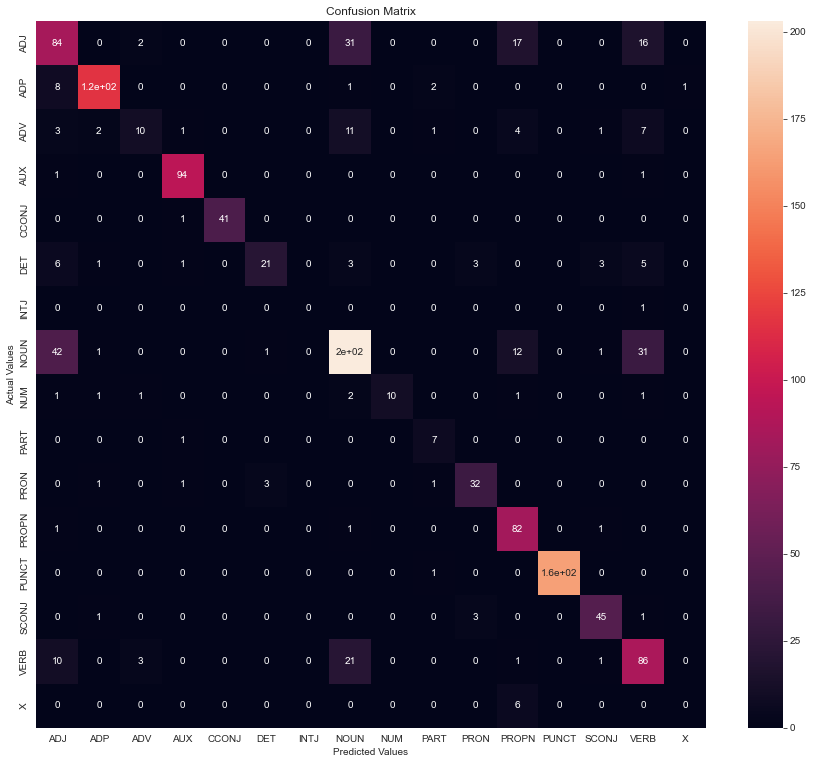

In [186]:
classes = np.union1d(np.unique(actual), np.unique(predicted))
cm = metrics.confusion_matrix(actual, predicted)
cm_df = pd.DataFrame(cm,
                     index = classes,
                     columns = classes)
#Plotting the confusion matrix
plt.figure(figsize=(15,13))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [157]:
sentence = Sentence('Srbija je tokom bombardovanja 1990 devedesetih izgubila mnoge kulturne znamenitosti.')

# predict tags and print
model.predict(sentence)

print(sentence.to_tagged_string())

Sentence: "Srbija je tokom bombardovanja 1990 devedesetih izgubila mnoge kulturne znamenitosti ." → ["Srbija"/PROPN, "je"/AUX, "tokom"/ADJ, "bombardovanja"/NOUN, "1990"/ADJ, "devedesetih"/NOUN, "izgubila"/ADJ, "mnoge"/NOUN, "kulturne"/ADJ, "znamenitosti"/NOUN, "."/PUNCT]


In [188]:
model.eval()

SequenceTagger(
  (embeddings): StackedEmbeddings(
    (list_embedding_0): WordEmbeddings(
      'glove'
      (embedding): Embedding(400001, 100)
    )
    (list_embedding_1): FlairEmbeddings(
      (lm): LanguageModel(
        (drop): Dropout(p=0.05, inplace=False)
        (encoder): Embedding(300, 100)
        (rnn): LSTM(100, 2048)
        (decoder): Linear(in_features=2048, out_features=300, bias=True)
      )
    )
    (list_embedding_2): FlairEmbeddings(
      (lm): LanguageModel(
        (drop): Dropout(p=0.05, inplace=False)
        (encoder): Embedding(300, 100)
        (rnn): LSTM(100, 2048)
        (decoder): Linear(in_features=2048, out_features=300, bias=True)
      )
    )
  )
  (word_dropout): WordDropout(p=0.05)
  (locked_dropout): LockedDropout(p=0.5)
  (embedding2nn): Linear(in_features=4196, out_features=4196, bias=True)
  (rnn): LSTM(4196, 256, batch_first=True, bidirectional=True)
  (linear): Linear(in_features=512, out_features=20, bias=True)
  (loss_function): V

In [195]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

print(metrics.classification_report(actual,predicted))

              precision    recall  f1-score   support

         ADJ       0.54      0.56      0.55       150
         ADP       0.94      0.91      0.92       128
         ADV       0.62      0.25      0.36        40
         AUX       0.95      0.98      0.96        96
       CCONJ       1.00      0.98      0.99        42
         DET       0.84      0.49      0.62        43
        INTJ       0.00      0.00      0.00         1
        NOUN       0.74      0.70      0.72       291
         NUM       1.00      0.59      0.74        17
        PART       0.58      0.88      0.70         8
        PRON       0.84      0.84      0.84        38
       PROPN       0.67      0.96      0.79        85
       PUNCT       1.00      0.99      1.00       165
       SCONJ       0.87      0.90      0.88        50
        VERB       0.58      0.70      0.63       122
           X       0.00      0.00      0.00         6

    accuracy                           0.78      1282
   macro avg       0.70   

C:\Users\vladimir\anaconda3\envs\ML3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vladimir\anaconda3\envs\ML3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vladimir\anaconda3\envs\ML3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
